<a href="https://colab.research.google.com/github/Data-Science-and-Data-Analytics-Courses/UniMelb-A-First-Course-In-Statistical-Learning-MAST90104_2019_SM2/blob/master/assignment2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2
*Name (ID)*: Vinh Nguyen (1029531)  
*Workshop*: Friday 04:15 PM  

---



## Setup

In [0]:
import sys
from pathlib import Path

# Notebook Library
url = "https://github.com/Data-Science-and-Data-Analytics-Courses/Notebook-Library"
repo = Path("/nblib")
!git clone "{url}" "{repo}"
if repo.parent.as_posix() not in sys.path:
  sys.path.append(repo.parent.as_posix())
%run "{repo}/.Importable.ipynb"

from nblib.imports.Basic import *
from nblib import Git

# Remote
URL = "https://github.com/Data-Science-and-Data-Analytics-Courses/UniMelb-A-First-Course-In-Statistical-Learning-MAST90104_2019_SM2"
REPO = Git.clone(URL, dest="/content")
if REPO.as_posix() not in sys.path:
  sys.path.append(REPO.as_posix())

# Working directory
os.chdir(REPO/"assignment2")

from nblib.imports.RPy import *
from setup.Setup import *

clear_output()

In [0]:
%%R

install.packages("car")
library(car)

## Problem 1
Consider a general full rank linear model y = Xβ +ε with p > 2 parameters. Derive an expression
for a joint 100(1 − α)% confidence region for parameters βi and βj , where i and j are arbitrary.  

The least squares estimator for $\beta$:  
$$
\begin{align}
b ∼ MV N\left(β, V\right)
\end{align}
$$
where:  
$$
V = \sigma^2(X^T X)^{−1} = \sigma^2 \begin{bmatrix}
    v_{11} & \dots  & v_{1i} & \dots & v_{1j} & \dots & v_{1p} \\
    \vdots & \ddots & \vdots &  & \vdots &  & \vdots \\
    v_{i1} & \dots  & {\bf v_{ii}} & \dots & {\bf v_{ij}} & \dots & v_{ip} \\
    \vdots &  & \vdots & \ddots & \vdots &  & \vdots \\
    v_{j1} & \dots  & {\bf v_{ji}} & \dots & {\bf v_{jj}} & \dots & v_{jp} \\
    \vdots &  & \vdots &  & \vdots & \ddots & \vdots \\
    v_{p1} & \dots  & v_{pi} & \dots & v_{pj} & \dots & v_{pp} \\
\end{bmatrix}
$$

Sub-vector of b:  
$$
\begin{align}
b' = \begin{bmatrix}
    b_{i} \\
    b_{j} \\
\end{bmatrix} ∼ MV N\left(\beta', V'\right)
\end{align}
$$
where:  
$$
\beta' = \begin{bmatrix}
    \beta_{i} \\
    \beta_{j} \\
\end{bmatrix} \quad
V' = \sigma^2 \begin{bmatrix}
    {\bf v_{ii}} & {\bf v_{ij}} \\
    {\bf v_{ji}} & {\bf v_{jj}} \\
\end{bmatrix}
$$

Let:  
$$
\begin{align}
& \qquad \qquad \qquad \text{i}^\text{th} \qquad \ \ \text{j}^\text{th} \\
C &= \begin{bmatrix}
    0 & \dots  & {\bf 1} & \dots & 0 & \dots & 0 \\
    0 & \dots  & 0 & \dots & {\bf 1} & \dots & 0 \\
\end{bmatrix} \quad (2 \text{ x } p) \\
\end{align}
$$
Rewrite:  
$$
\begin{align}
V' &= C V C^T \\
&= \sigma^2 C (X^T X)^{−1} C^T \\
\end{align}
$$
Since $X^TX$ is symmetric and positive definite, there exists a unique symmetric positive definite square root $(X^TX)^{1/2}$.  
$$
\begin{align}
V' &= \sigma^2 C \left((X^TX)^{1/2} (X^TX)^{1/2}\right)^{−1} C^T \\
&= \sigma^2 C (X^TX)^{-1/2} (X^TX)^{-1/2} C^T \\
&= \sigma^2 \left((X^TX)^{-1/2} C^T\right)^T \left((X^TX)^{-1/2} C^T\right) \\
&= \sigma^2 A^T A & \left(A=(X^TX)^{-1/2} C^T\right) \\
\end{align}
$$
Rank of $V'$:  
$$
\begin{align}
r(V') &= r(\sigma^2 A^T A) = r(A) = r\left((X^TX)^{-1/2} C^T\right) = r(C^T) = 2 \\
\end{align}
$$
recalling $(X^TX)^{-1/2} \text{ positive definite} \Rightarrow \text{non-singlular} $.  
Thus, $V'(2 \text{ x } 2)$ full rank $\Rightarrow$ invertible.  

According to Corollary 3.10, quadratic form  
$$
\begin{align}
(b' − β')^T V'^{-1} (b' − β') = \frac{(b' − β')^T \left(C (X^T X)^{−1} C^T\right)^{-1} (b' − β')}{σ^2}
\end{align}
$$
has a $\chi^2$ distribution with 2 degrees of freedom.  

Also,  
$$
\begin{align}
\frac{(n − p)s^2}{σ^2}
\end{align}
$$
has a $χ^2$ distribution with (n − p) degrees of freedom.  

Hence,  
$$
\begin{align}
\frac{\frac{(b' − β')^T \left(C (X^T X)^{−1} C^T\right)^{-1} (b' − β')}{2σ^2}}{\frac{(n − p)s^2}{(n-p) σ^2}} = \frac{(b' − β')^T \left(C (X^T X)^{−1} C^T\right)^{-1} (b' − β')}{2s^2} \\
\end{align}
$$
has an F distribution with 2 and (n − p) degrees of freedom.  

**Joint 100(1 − α)% confidence region**  
$$
\begin{align}
P\left(\frac{(b' − β')^T \left(C (X^T X)^{−1} C^T\right)^{-1} (b' − β')}{2s^2} \leq f_{\alpha} \right) &= 1 - \alpha \\
P\left((b' − β')^T \left(C (X^T X)^{−1} C^T\right)^{-1} (b' − β') \leq 2s^2 f_{\alpha} \right) &= 1 - \alpha \\
(b' − β')^T \left(C (X^T X)^{−1} C^T\right)^{-1} (b' − β') &\leq 2s^2 f_{\alpha} & (\text{confidence region}) \\
\end{align}
$$  
which is a region bounded by an ellipse.  


## Problem 2
An experiment is conducted to estimate the annual demand for cars, based on their cost, the
current unemployment rate, and the current interest rate. A survey is conducted and the following
measurements obtained:  
Cars sold (×103
) Cost ($k) Unemployment rate (%) Interest rate (%)  
5.5 7.2 8.7 5.5  
5.9 10.0 9.4 4.4  
6.5 9.0 10.0 4.0  
5.9 5.5 9.0 7.0  
8.0 9.0 12.0 5.0  
9.0 9.8 11.0 6.2  
10.0 14.5 12.0 5.8  
10.8 8.0 13.7 3.9  
For this question, you may NOT use the lm function in R.  


(a) Fit a linear model to the data and estimate the parameters and variance.  


In [0]:
%%R

y <- c(5.5, 5.9, 6.5, 5.9, 8.0, 9.0, 10.0, 10.8) # cars sold
x <- matrix(c(1, 7.2, 8.7, 5.5, 
              1, 10.0, 9.4, 4.4, 
              1, 9.0, 10.0, 4.0, 
              1, 5.5, 9.0, 7.0,
              1, 9.0, 12.0, 5.0,
              1, 9.8, 11.0, 6.2,
              1, 14.5, 12.0, 5.8,
              1, 8.0, 13.7, 3.9), nrow=8, ncol=4, byrow=TRUE) # cost, unemployment rate, interest rate
n <- dim(x)[1] # number of samples
p <- dim(x)[2] # number of parameters

print("Parameters")
b <- solve(t(x) %*% x, t(x) %*% y)
print(b)

print("Sample variance")
var_sp <- sum((y - x %*% b)^2) / (n-p)
print(var_sp)

[1] "Parameters"
           [,1]
[1,] -7.4044796
[2,]  0.1207646
[3,]  1.1174846
[4,]  0.3861206
[1] "Sample variance"
[1] 0.3955368


(b) Which two of the parameters have the highest (in magnitude) covariance in their estimators?  

$$
b \sim MVN \left( \beta, \sigma^2 (X^T X)^{-1} \right)
$$


In [0]:
%%R

print("xTx inverse")
xTx_inv <- solve(t(x) %*% x)
print(xTx_inv)

print("Parameters with highest (in magnitude) covariance")
inv_abs <- abs(xTx_inv) # absolute inverse
diag(inv_abs) <- NA # nullify diagonal
imax <- which(inv_abs == max(inv_abs, na.rm=TRUE), arr.ind = TRUE) # row, col of max covariance
print(imax)

[1] "xTx inverse"
            [,1]         [,2]        [,3]         [,4]
[1,] 13.49743324 -0.054817613 -0.69854293 -1.029731987
[2,] -0.05481761  0.024498395 -0.01478859 -0.001937333
[3,] -0.69854293 -0.014788594  0.06226378  0.031714790
[4,] -1.02973199 -0.001937333  0.03171479  0.135362495
[1] "Parameters with highest (in magnitude) covariance"
     row col
[1,]   1   4


(c) Find a 99% confidence interval for the average number of $8, 000 cars sold in a year which has
unemployment rate 9% and interest rate 5%.  

Confidence interval for expected response:  
$$
\begin{align}
(x^*)^T b ± t_{α/2} s\sqrt{(x^∗)^T (X^T X)^{−1}x^∗}
\end{align}
$$


In [0]:
%%R

print("99% confidence interval")
x_new <- c(1, 8, 9, 5)
confint <- x_new %*% b + c(-1, 1) * qt(0.995, df=n-p, ncp=0) * sqrt(var_sp) * sqrt(x_new%*%xTx_inv%*%x_new)
print(confint)

[1] "99% confidence interval"
[1] 3.926075 7.173129


(d) A prediction interval for the number of cars sold in such a year is calculated to be (4012, 7087).
Find the confidence level used.  

Prediction interval:  
$$
\begin{align}
(x^*)^T b ± t_{α/2} s\sqrt{1 + (x^∗)^T (X^T X)^{−1}x^∗}
\end{align}
$$

Confidence level:  
$$
\begin{align}
CI_{\text{upper-bound}} - CI_{\text{lower-bound}} &= 2 t_{α/2} s\sqrt{1 + (x^∗)^T (X^T X)^{−1}x^∗} \quad (\text{bounds symmetric around } (x^*)^T b) \\
t_{α/2} &= \frac{CI_{\text{upper-bound}} - CI_{\text{lower-bound}}}{2 s\sqrt{1 + (x^∗)^T (X^T X)^{−1}x^∗}} \\
\text{confidence level} &= 1 - 2 \left(1 - F(t_{α/2})\right) = 2 F(t_{α/2}) - 1 \\
\end{align}
$$


In [0]:
%%R

lb <- 4.012 # lower bound
ub <- 7.087 # upper bound
print("value of t-statistic")
t <- (ub - lb) / (2 * sqrt(var_sp) * sqrt(1+x_new%*%xTx_inv%*%x_new))
print(t)

print("confidence level (%)")
level <- 100 * (1 - 2*pt(t, df=n-p, ncp=0, lower.tail=FALSE))
print(level)

[1] "value of t-statistic"
        [,1]
[1,] 2.13237
[1] "confidence level (%)"
         [,1]
[1,] 90.00588


(e) Test for model relevance using a corrected sum of squares.  

$$
H_0 : β = 0 \\
H_1 : β \neq 0 \\
$$

In [0]:
%%R

print("corrected sum of squares regression")
preds <- x %*% b # predicted cars sold
ss_reg <- t(preds) %*% preds # sum squares regression
ssreg_correct <- ss_reg - sum(y)^2/n # corrected sum squares regression
print(ssreg_correct)

print("corrected sum of squares of residuals")
res <- y - preds
ssres_correct <- ss_res <- t(res) %*% res # corrected sum squares residuals
print(ssres_correct)

print("F ratio")
f <- (ssreg_correct/(p-1)) / (ssres_correct/(n-p))
print(f)

print("p-value")
pf(f, df1=p-1, df2=n-p, lower.tail=FALSE)

[1] "corrected sum of squares regression"
         [,1]
[1,] 27.85785
[1] "corrected sum of squares of residuals"
         [,1]
[1,] 1.582147
[1] "F ratio"
         [,1]
[1,] 23.47683
[1] "p-value"
            [,1]
[1,] 0.005317255


Since p-val < 0.05, we can reject the Null at 95% confidence level.  

## Probelem 3
For this question we use the data set UCD.csv (available on the LMS). This data set, collected on
158 UC Davis students (self-reported), includes the following variables:  
ID = the ID for that student  
alcohol = average number of alcoholic drinks consumed per week  
exercise = average hours per week the student exercises  
height = the student’s height (in inches)  
male = indicator variable, 1 if male and 0 if female  
dadht = the student’s father’s height  
momht = the student’s mother’s height  
We seek to predict a person’s height, based on the given data.  


(a) Fit a linear model using all of the variables (except ID).  


In [0]:
%%R

# Data
df <- read.csv("UCD(1).csv", header=TRUE)
print(head(df))

# Fit model
model <- lm(height ~ alcohol + exercise + male + dadht + momht, data=df)
print(summary(model))

  ID alcohol exercise height male dadht momht
1  1      12     10.0     66    0    71    66
2  2       0      5.0     64    0    68    62
3  3       0      2.0     72    1    65    64
4  4       0      3.0     68    1    74    62
5  5       0      6.0     68    1    70    59
6  6       5      6.5     64    0    70    65

Call:
lm(formula = height ~ alcohol + exercise + male + dadht + momht, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2166  -1.4627   0.0494   1.4502   6.2616 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.94900    5.08126   4.123 6.14e-05 ***
alcohol      0.05068    0.02616   1.938 0.054524 .  
exercise    -0.05442    0.04501  -1.209 0.228506    
male         5.16073    0.39794  12.969  < 2e-16 ***
dadht        0.38182    0.05394   7.079 5.01e-11 ***
momht        0.27060    0.07061   3.832 0.000185 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.318 o

(b) Test for model relevance, using a corrected sum of squares.  

$$
\begin{align}
H_0 &: β = 0 \quad (\text{ all parameters (except intercept) 0}) \\
H_1 &: β \neq 0 \\
\end{align}
$$


In [0]:
%%R

nsamples <- dim(df)[1] # number of samples
nparams <- 6 # number of parameters

print("corrected sum of squares regression")
preds <- predict(model) # predicted values
ss_reg <- t(preds) %*% preds # sum squares regression
ssreg_correct <- ss_reg - sum(df$height)^2/nsamples # corrected sum squares regression
print(ssreg_correct)

print("corrected sum of squares of residuals")
res <- residuals(model)
ssres_correct <- ss_res <- t(res) %*% res # corrected sum squares residuals
print(ssres_correct)

print("F ratio")
f <- (ssreg_correct/(nparams-1)) / (ssres_correct/(nsamples-nparams))
print(f)

print("p-value")
pf(f, df1=nparams-1, df2=nsamples-nparams, lower.tail=FALSE)

[1] "corrected sum of squares regression"
         [,1]
[1,] 1664.331
[1] "corrected sum of squares of residuals"
         [,1]
[1,] 816.8856
[1] "F ratio"
         [,1]
[1,] 61.93728
[1] "p-value"
             [,1]
[1,] 6.052692e-35


Since p-val < 0.01, we can reject the Null at 99% confidence level.  

(c) Use forward selection with F tests to select variables for your model.  

In [0]:
%%R

# Empty model
m <- lm(height ~ 1, data=df)
test <- add1(m, scope= ~ . + alcohol + exercise + male + dadht + momht, test="F")
print(test)
# variable with p-value smallest and < 0.05
imin <- which.min(test$"Pr(>F)") # index of smallest p-value
print(sprintf("Selected variable: %s", if (test$"Pr(>F)"[imin] < 0.05) rownames(test)[imin] else NA))

# 1-variable model
m <- lm(height ~ male, data=df)
test <- add1(m, scope= ~ . + alcohol + exercise + dadht + momht, test="F")
print(test)
# variable with p-value smallest and < 0.05
imin <- which.min(test$"Pr(>F)") # index of smallest p-value
print(sprintf("Selected variable: %s", if (test$"Pr(>F)"[imin] < 0.05) rownames(test)[imin] else NA))

# 2-variable model
m <- lm(height ~ male + dadht, data=df)
test <- add1(m, scope= ~ . + alcohol + exercise + momht, test="F")
print(test)
# variable with p-value smallest and < 0.05
imin <- which.min(test$"Pr(>F)") # index of smallest p-value
print(sprintf("Selected variable: %s", if (test$"Pr(>F)"[imin] < 0.05) rownames(test)[imin] else NA))

# 3-variable model
m <- lm(height ~ male + dadht + momht, data=df)
test <- add1(m, scope= ~ . + alcohol + exercise, test="F")
print(test)
# variable with p-value smallest and < 0.05
imin <- which.min(test$"Pr(>F)") # index of smallest p-value
print(sprintf("Selected variable: %s", if (test$"Pr(>F)"[imin] < 0.05) rownames(test)[imin] else NA))


Single term additions

Model:
height ~ 1
         Df Sum of Sq    RSS    AIC  F value    Pr(>F)    
<none>                2481.2 437.12                       
alcohol   1    469.91 2011.3 405.94  36.4470 1.103e-08 ***
exercise  1     33.51 2447.7 436.97   2.1358    0.1459    
male      1   1054.11 1427.1 351.73 115.2266 < 2.2e-16 ***
dadht     1    407.47 2073.8 410.77  30.6525 1.279e-07 ***
momht     1    287.01 2194.2 419.69  20.4056 1.230e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "Selected variable: male"
Single term additions

Model:
height ~ male
         Df Sum of Sq     RSS    AIC F value    Pr(>F)    
<none>                1427.11 351.73                      
alcohol   1    152.46 1274.65 335.88 18.5391 2.941e-05 ***
exercise  1      0.67 1426.44 353.65  0.0732    0.7871    
dadht     1    491.25  935.86 287.06 81.3632 6.773e-16 ***
momht     1    254.99 1172.12 322.63 33.7192 3.492e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.0

We use variables **male**, **dadht**, **momht** in our final model.  


(d) Starting from a full model, use stepwise selection with AIC to select variables for your model.  
Use this as your final model; comment briefly on the variables included.  


In [0]:
%%R

model_final <- model # start with full model
model_final <- step(model_final, scope=~., steps=1) # exercise dropped
model_final <- step(model_final, scope=~. + exercise, steps=1) # stop
summary(model_final)

Start:  AIC=271.58
height ~ alcohol + exercise + male + dadht + momht

           Df Sum of Sq     RSS    AIC
- exercise  1      7.86  824.74 271.09
<none>                   816.89 271.58
- alcohol   1     20.18  837.06 273.43
- momht     1     78.93  895.82 284.15
- dadht     1    269.34 1086.22 314.60
- male      1    903.86 1720.74 387.29

Step:  AIC=271.09
height ~ alcohol + male + dadht + momht

Start:  AIC=271.09
height ~ alcohol + male + dadht + momht

           Df Sum of Sq     RSS    AIC
<none>                   824.74 271.09
+ exercise  1      7.86  816.89 271.58
- alcohol   1     15.86  840.60 272.10
- momht     1     81.25  905.99 283.94
- dadht     1    270.17 1094.91 313.86
- male      1    897.14 1721.88 385.40

Call:
lm(formula = height ~ alcohol + male + dadht + momht, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.213  -1.400   0.052   1.523   6.240 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.48579    5.074

**Comment**: amongst the variables, "male" (sex) shows to have the strongest influence on the student's height, while "alcohol" has the least significant effect, according to their estimates.  


(e) Test whether the parameters corresponding to father’s and mother’s heights are equal.  

$$
\begin{align}
H_0: \beta_3 \text{ (dadht)} = \beta_4 \text{ (momht)} \\
H_1: \beta_3 \text{ (dadht)} \neq \beta_4 \text{ (momht)} \\
\end{align}
$$

In [0]:
%%R

test <- linearHypothesis(model_final, "dadht = momht")
print(test)

print("p-value")
pval <- test$"Pr(>F)"[2]
print(pval)

print("Reject Null at 95% confidence level?")
print(pval < 0.05)

Linear hypothesis test

Hypothesis:
dadht - momht = 0

Model 1: restricted model
Model 2: height ~ alcohol + male + dadht + momht

  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1    154 831.20                           
2    153 824.74  1     6.453 1.1971 0.2756
[1] "p-value"
[1] 0.2756189
[1] "Reject Null at 95% confidence level?"
[1] FALSE


(f) Comment on the suitability of your final model, using diagnostic plots.  


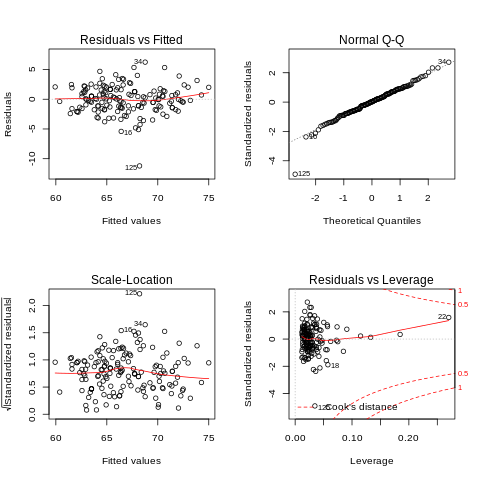

In [0]:
%%R

par(mfrow = c(2, 2))
plot(model_final)

**Linearity of data** (Residuals vs Fitted plot): the red line is approximately horizontal at zero, indicating there is no pattern in the residual plot. This suggests that we can assume linear relationship between **height** and **alcohol**, **male**, **dadht**, **momht**.  

**Homogeneity of variance** (scale-location plot): points are not equally spread along the red line, suggesting non-constant variances in residuals.  

**Normality of residuals** (QQ plot): most points fall approximately along the reference line, so we can assume normality.  

**Outliers** (Residuals vs Leverage plot): most points have low standardized residuals ($\leq 3$ in magnitude), except the one in the lower-left corner.  

In summary, the final model is quite suitable for modeling the linear relationship between the responses and the predictors.  


## Problem 4
A study was conducted to determine the effect of the size of the root system on the growth of
Douglas-fir seedlings when they are planted out. Seedlings were obtained from three seed lots,
and when they were planted out their root volume was classified as small (RV1), medium (RV2),
or large (RV3). The heights of the seedlings were then measured at the end of the first growing
season. The data from the experiment is given in the file douglas.csv.  


(a) Fit a linear model with interaction to the data. Calculate a confidence interval for the difference between the heights of large (RV3) and medium (RV2) seedlings in the B349 seed
lot.  


In [0]:
%%R

# Data
df <- read.csv("douglas(2).csv", header=TRUE)
print(head(df))

# Fit model
model <- lm(Height ~ RootVolume * SeedLot, data=df)
print(summary(model))

x <- model.matrix(model) # design matrix
b <- model$coef # estimated parameters
n <- nrow(x) # number of samples
p <- length(b) # number of parameters
s <- sigma(model) # residual standard error

  Plot RootVolume SeedLot Height
1    1        RV3    A567  54.44
2    2        RV3    J052  56.44
3    3        RV1    A567  46.97
4    4        RV2    A567  54.57
5    5        RV1    B349  49.32
6    6        RV2    B349  55.00

Call:
lm(formula = Height ~ RootVolume * SeedLot, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3383 -1.2537  0.0217  0.7733  4.0517 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                46.5050     0.7123  65.286  < 2e-16 ***
RootVolumeRV2               7.0000     1.0074   6.949 1.21e-08 ***
RootVolumeRV3               8.3450     1.0074   8.284 1.34e-10 ***
SeedLotB349                 3.0833     1.0074   3.061  0.00372 ** 
SeedLotJ052                 1.7217     1.0074   1.709  0.09433 .  
RootVolumeRV2:SeedLotB349  -0.7133     1.4246  -0.501  0.61902    
RootVolumeRV3:SeedLotB349   1.4083     1.4246   0.989  0.32817    
RootVolumeRV2:SeedLotJ052  -1.6600     1.4246  -1.165  0.25008

Predictor for height of large (RV3) seedlings in the B349 seed lot:  
$$
\begin{align}
x_{3B} &= \begin{bmatrix} 1 & 0 & 1 & 1 & 0 & 0 & 1 & 0 & 0 \end{bmatrix} \\
\end{align}
$$

Predictor for height of large (RV2) seedlings in the B349 seed lot:  
$$
\begin{align}
x_{2B} &= \begin{bmatrix} 1 & 1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 \end{bmatrix} \\
\end{align}
$$

Predictor for difference between the heights:  
$$
\begin{align}
x &= x_{3B} - x_{2B} \\
\end{align}
$$


In [0]:
%%R

print("predictor")
x3b <- c(1, 0, 1, 1, 0, 0, 1, 0, 0)
x2b <- c(1, 1, 0, 1, 0, 1, 0, 0, 0)
new <- x3b - x2b
print(new)

print("95% prediction interval")
xTx <- t(x) %*% x
pred <- new%*%b
confint <- pred + c(-1, 1) * qt(0.975, df=n-p) * s * sqrt(1+new%*%solve(xTx)%*%new)
print(confint)

[1] "predictor"
[1]  0 -1  1  0  0 -1  1  0  0
[1] "95% prediction interval"
[1] -0.5912613  7.5245947


(b) Is it possible to estimate, from this model, an overall difference between the heights of large and medium seedlings?  

Since there is interaction in this model and we do not know how differently SeedLot A567 may have effect on large and medium seedlings, the overall difference between their heights is not estimable.  

(c) Test the hypothesis that the height of seedlings from the J052 plot has no dependence on root
volume.  

| | (Intercept) | RootVolumeRV2 | RootVolumeRV3 | SeedLotB349 | SeedLotJ052 | RootVolumeRV2:SeedLotB349 | RootVolumeRV3:SeedLotB349 | RootVolumeRV2:SeedLotJ052 | RootVolumeRV3:SeedLotJ052 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| $\boldsymbol{\beta}$ | $\beta_0$ | $\beta_1$ | $\beta_2$ | $\beta_3$ | $\beta_4$ | $\beta_5$ | $\beta_6$ | $\beta_7$ | $\beta_8$ |
| $\boldsymbol{x_{RV1-J052}}$ | 1 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 |
| $\boldsymbol{x_{RV2-J052}}$ | 1 | 1 | 0 | 0 | 1 | 0 | 0 | 1 | 0 |
| $\boldsymbol{x_{RV3-J052}}$ | 1 | 0 | 1 | 0 | 1 | 0 | 0 | 0 | 1 |

Null hypothesis:  
$$
\begin{align}
H_0 &: \text{height}_{\text{RV1-J052}} = \text{height}_{\text{RV2-J052}} = \text{height}_{\text{RV3-J052}} \\
H_0 &: \text{height}_{\text{RV2-J052}} - \text{height}_{\text{RV1-J052}} = 0 \\
& \quad \text{height}_{\text{RV3-J052}} - \text{height}_{\text{RV1-J052}} = 0 \\
H_0 &: (\boldsymbol{x_{RV2-J052}} - \boldsymbol{x_{RV1-J052}}) \beta = 0 \\
& \quad (\boldsymbol{x_{RV3-J052}} - \boldsymbol{x_{RV1-J052}}) \beta = 0 \\
\end{align}
$$

In [0]:
%%R

print("C matrix")
x1j <- c(1, 0, 0, 0, 1, 0, 0, 0, 0)
x2j <- c(1, 1, 0, 0, 1, 0, 0, 1, 0)
x3j <- c(1, 0, 1, 0, 1, 0, 0, 0, 1)
c <- matrix(c(x2j - x1j, x3j - x1j), nrow=2, byrow=TRUE)
print(c)

test <- linearHypothesis(model, c)
print(test)
print("Reject Null at 95% confidence level?")
print(test["Pr(>F)"][2,] < 0.05) # check p-value

[1] "C matrix"
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9]
[1,]    0    1    0    0    0    0    0    1    0
[2,]    0    0    1    0    0    0    0    0    1
Linear hypothesis test

Hypothesis:
RootVolumeRV2  + RootVolumeRV2:SeedLotJ052 = 0
RootVolumeRV3  + RootVolumeRV3:SeedLotJ052 = 0

Model 1: restricted model
Model 2: Height ~ RootVolume * SeedLot

  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1     47 369.12                                  
2     45 137.00  2    232.12 38.122 2.065e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "Reject Null at 95% confidence level?"
[1] TRUE


(d) Generate an interaction plot for the data. Is there any evidence of an interaction?  

The lines (in the graphs below) show dissimilar patterns and almost cross each other.
This suggest that there may be interaction between the factors.
However, more tests need to be performed to confirm this.  


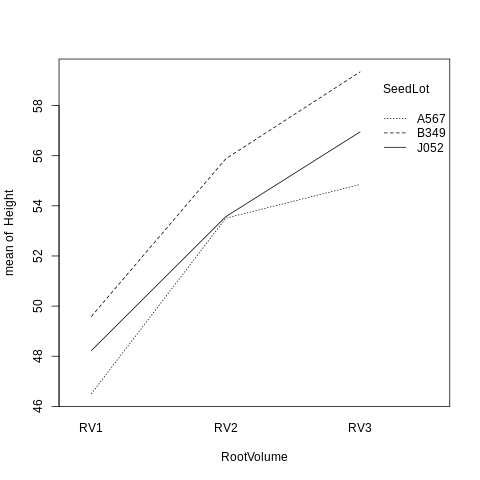

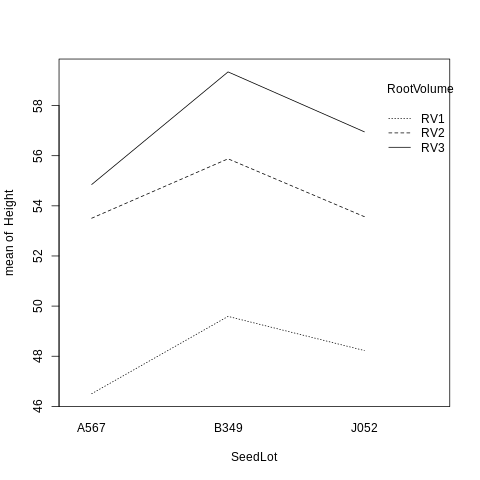

In [0]:
%%R

with(df, {interaction.plot(RootVolume, SeedLot, Height, fixed = TRUE)
         interaction.plot(SeedLot, RootVolume, Height, fixed = TRUE)})

(e) Test for the presence of interaction between root volume and seed lot.  

| | (Intercept) | RootVolumeRV2 | RootVolumeRV3 | SeedLotB349 | SeedLotJ052 | RootVolumeRV2:SeedLotB349 | RootVolumeRV3:SeedLotB349 | RootVolumeRV2:SeedLotJ052 | RootVolumeRV3:SeedLotJ052 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| $\boldsymbol{\beta}$ | $\beta_0$ | $\beta_1$ | $\beta_2$ | $\beta_3$ | $\beta_4$ | $\beta_5$ | $\beta_6$ | $\beta_7$ | $\beta_8$ |

Hypothesis:  
$$
\begin{align}
H_0 &: \beta_5 = \beta_6 = \beta_7 = \beta_8 = 0 \quad (\text{no interaction}) \\
H_1 &: \text{otherwise} \\
\end{align}
$$


In [0]:
%%R

# hypothesis
hypo <- c("RootVolumeRV2:SeedLotB349 = 0",
          "RootVolumeRV3:SeedLotB349 = 0",
          "RootVolumeRV2:SeedLotJ052 = 0",
          "RootVolumeRV3:SeedLotJ052 = 0")
test <- linearHypothesis(model, hypo)
print(test)

print("Reject Null at 95% confidence level?")
print(test["Pr(>F)"][2,] < 0.05) # check p-value

Linear hypothesis test

Hypothesis:
RootVolumeRV2:SeedLotB349 = 0
RootVolumeRV3:SeedLotB349 = 0
RootVolumeRV2:SeedLotJ052 = 0
RootVolumeRV3:SeedLotJ052 = 0

Model 1: restricted model
Model 2: Height ~ RootVolume * SeedLot

  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1     49 147.67                           
2     45 137.00  4    10.674 0.8765 0.4855
[1] "Reject Null at 95% confidence level?"
[1] FALSE


(f) Perform forwards selection to determine a final model.  


In [0]:
%%R

# Empty model
model_final <- lm(Height ~ 1, data=df)
test <- add1(model_final, scope= ~ . + RootVolume, test="F")
print(test)
# variable with p-value smallest and < 0.05
imin <- which.min(test$"Pr(>F)") # index of smallest p-value
print(sprintf("Selected variable: %s", if (test$"Pr(>F)"[imin] < 0.05) rownames(test)[imin] else NA))

# 1-variable model
model_final <- lm(Height ~ RootVolume, data=df)
test <- add1(model_final, scope= ~ . + SeedLot, test="F")
print(test)
# variable with p-value smallest and < 0.05
imin <- which.min(test$"Pr(>F)") # index of smallest p-value
print(sprintf("Selected variable: %s", if (test$"Pr(>F)"[imin] < 0.05) rownames(test)[imin] else NA))

# 2-variable model
model_final <- lm(Height ~ RootVolume + SeedLot, data=df)
print(summary(model_final))

Single term additions

Model:
Height ~ 1
           Df Sum of Sq     RSS     AIC F value    Pr(>F)    
<none>                  1003.83 159.820                      
RootVolume  2    755.68  248.16  88.354  77.651 3.336e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "Selected variable: RootVolume"
Single term additions

Model:
Height ~ RootVolume
        Df Sum of Sq    RSS    AIC F value Pr(>F)    
<none>               248.16 88.354                   
SeedLot  2    100.48 147.67 64.325  16.671  3e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "Selected variable: SeedLot"

Call:
lm(formula = Height ~ RootVolume + SeedLot, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6352 -1.2244  0.0979  1.0551  3.7548 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    46.5702     0.5283  88.159  < 2e-16 ***
RootVolumeRV2   6.2089     0.5787  10.730 1.85e-14 ***
RootVolumeRV3   8.9406

(g) Is it possible to estimate, from this model, an overall difference between the heights of large
and medium seedlings?  

Overall height of large seedlings:  
$$
\begin{align}
x_{3B}^T \beta + x_{3J}^T \beta \\
\end{align}
$$

Overall height of medium seedlings:  
$$
\begin{align}
x_{2B}^T \beta + x_{2J}^T \beta \\
\end{align}
$$

Overall difference between the heights of large and medium seedlings:  
$$
\begin{align}
x_{3B}^T \beta + x_{3J}^T \beta - x_{2B}^T \beta - x_{2J}^T \beta \\
\end{align}
$$
If each term is estimable, the overall difference is estimable.  
If each term is an element of $Xβ$ ($X$ design matrix), it is estimable.  
If the predictors $x_{3B}^T, x_{3J}^T, x_{2B}^T, x_{2J}^T$ are included in $X$, all terms are elements of $Xβ$.  

Since there's no interaction terms, let us verify that $x_{3B}^T, x_{3J}^T, x_{2B}^T, x_{2J}^T$ are subsets of $X$ by looking for their respective records **(RV3, B349), (RV3, J052), (RV2, B349), (RV2, J052)** in the dataset.  


In [0]:
%%R

xcat <- df[c("RootVolume", "SeedLot")] # extract RootVolume, SeedLot columns
is_subset <- any(apply(xcat, 1, function(x) all(x == c("RV3", "B349")))) &
             any(apply(xcat, 1, function(x) all(x == c("RV3", "J052")))) &
             any(apply(xcat, 1, function(x) all(x == c("RV2", "B349")))) &
             any(apply(xcat, 1, function(x) all(x == c("RV2", "J052"))))
print("overall difference estimable?")
print(is_subset)

[1] "overall difference estimable?"
[1] TRUE


## Problem 5
You wish to perform a study to determine if 3 treatments each produce no effect using a completely
randomised design. To do this, you will test the hypothesis H0 : µ + τ1 = τ1 − τ2 = τ2 − τ3 = 0.
You are given resources to study 50 sample units.  


(a) Determine the optimal allocation of the number of units to assign to each treatment.  

$$
\begin{align}
var(\widehat{µ + τ_1}) &= var(\widehat{µ_1}) = \frac{\sigma^2}{n_1} \\
var(\widehat{τ_1 − τ_2}) &= \sigma^2 \left(\frac{1}{n_1} + \frac{1}{n_2}\right) \\
var(\widehat{τ_2 − τ_3}) &= \sigma^2 \left(\frac{1}{n_2} + \frac{1}{n_3}\right) \\
f(n_1, n_2, n_3, λ) &= σ^2 \left(\frac{2}{n_1} + \frac{2}{n_2} + \frac{1}{n_3}\right) + λ \left(\sum_{i=1}^{3} n_i - n\right) \\
\end{align}
$$

By taking derivative of $f(n_1, n_2, n_3, λ)$ w.r.t $n_i$, then setting to 0, we have:  
$$
\begin{align}
n_1^2 = n_2^2 &= 2\frac{\sigma^2}{\lambda} \\
n_3^2 &= \frac{\sigma^2}{\lambda} \\
\end{align}
$$

Solving for $n_1, n_2, n_3$ with $n_1 + n_2 + n_3 = n = 50$, we get:  
$$
\begin{align}
n_1 = n_2 = &= \sqrt{2} \frac{n}{1+2\sqrt{2}} \\
n_3 &= \frac{n}{1+2\sqrt{2}}
\end{align}
$$

In [0]:
%%R

n <- 50
n1 <- n2 <-round( sqrt(2) * n / (1+2*sqrt(2)))
n3 <- n - sum(n1, n2)
print("n1, n2, n3")
print(c(n1, n2, n3))

[1] "n1, n2, n3"
[1] 18 18 14


(b) Perform the random allocation. You must use R for randomisation and include your R commands and output.  


In [0]:
%%R

ni <- c(18, 18, 14)
x <- sample(n, n)

print("Group 1")
print(x[1:ni[1]])

print("Group 2")
print(x[(ni[1]+1):(ni[1]+ni[2])])

print("Group 3")
print(x[(ni[1]+ni[2]+1):n])

[1] "Group 1"
 [1]  9 23 24 18 48 22 37 39 26 32 33 47 16 21  1 40  6 45
[1] "Group 2"
 [1]  2 34 29 49 50 30  8 36 31 27 12 28  7 19 13 42 20 11
[1] "Group 3"
 [1] 43 14 46 10 35 25 17 38 15 44  3 41  5  4
